# Machine Learning Portfolio 1

|Name|Github|Kaggle|
|----|------|------|
|Henry Lau|HenryLau08|Henry Lau|
|Mohamed Belaachir|mobelaachir|mobelaachir|
|Jayden Debi-Tewari|Jaydendt1|jaydendt123|
|Quincy Soerohardjo|quincysoerohardjo2002|Quincy Soerohardjo|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Modeling](#modeling)
    - [K-Nearest Neighbours](#k-nearest-neighbors)
    - [Logistic Regression](#logistic-regression)
    - [SVM](#svm)
    - [Decision Tree](#decision-tree)
    - [Ensembles](#ensembles)
        - [Random Forest](#random-forest)
        - [Gradient Boosted Decision Trees](#gradient-boosted-decision-trees)
        - [XGBoost](#xgboost)
    - [Self-Assembled Ensemble](#self-assembled-ensemble)
- [Results](#results)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources)

In [45]:
# Libraries
import os
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight

In [2]:
pd.set_option('display.max_columns', None)

train = pd.read_csv('train.csv', index_col='id').sort_index()
test = pd.read_csv('test.csv', index_col='id')

## Data Overview

In [3]:
print('Train Data')
display(train.head(10))
print('Test Data')
display(test.head(10))

Train Data


age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Female  \
id                                                                              
1   80.0             0              1              67.45  25.6           True   
7   44.0             0              0             222.75  19.6           True   
8   79.0             0              0              99.23  25.1           True   
9   44.0             0              0             125.44  35.5          False   
10  34.0             0              0              89.11  28.0           True   
20  36.0             0              0              89.79  27.3          False   
22   5.0             0              0             100.81  20.6          False   
23  68.0             0              0              75.91  21.8           True   
24  72.0             0              1             113.65  27.4           True   
29  44.0             1              0             117.10  26.9          False   

    gender_Male  gender_Other  ever_married_No  ever_married_Yes  \
id                                                                 
1         False         False            False              True   
7         False         False            False              True   
8         False         False            False              True   
9          True         False            False              True   
10        False         False            False              True   
20         True         False            False              True   
22         True         False             True             False   
23        False         False            False              True   
24        False         False            False              True   
29         True         False            False              True   

    work_type_Govt_job  work_type_Never_worked  work_type_Private  \
id                                                                  
1                False                   False              False   
7                False                   False               True   
8                False                   False               True   
9                False                   False               True   
10               False                   False               True   
20                True                   False              False   
22               False                   False              False   
23               False                   False               True   
24               False                   False              False   
29               False                   False               True   

    work_type_Self-employed  work_type_children  Residence_type_Rural  \
id                                                                      
1                      True               False                 False   
7                     False               False                 False   
8                     False               False                 False   
9                     False               False                  True   
10                    False               False                 False   
20                    False               False                 False   
22                    False                True                  True   
23                    False               False                  True   
24                     True               False                  True   
29                    False               False                  True   

    Residence_type_Urban  smoking_status_formerly smoked  \
id                                                         
1                   True                           False   
7                   True                           False   
8                   True                           False   
9                  False                           False   
10                  True                           False   
20                  True                           False   
22                 False     

Test Data


age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
32840  52.0             0              0              97.32  21.8   
45158  30.0             0              0             227.99  47.7   
56105  26.0             0              0             113.28  24.4   
3112   24.0             0              0              79.15  21.0   
35224  63.0             0              0              89.69  33.3   
33344  43.0             0              1              96.93  29.6   
35699  16.0             0              0              82.25  30.9   
48440  38.0             0              0              78.90  25.3   
32256  23.0             0              0              72.60  31.2   
18285   6.0             0              0              95.45  17.0   

       gender_Female  gender_Male  gender_Other  ever_married_No  \
id                                                                 
32840           True        False         False            False   
45158           True        False         False            False   
56105           True        False         False            False   
3112            True        False         False            False   
35224           True        False         False            False   
33344          False         True         False            False   
35699           True        False         False             True   
48440           True        False         False             True   
32256           True        False         False             True   
18285           True        False         False             True   

       ever_married_Yes  work_type_Govt_job  work_type_Never_worked  \
id                                                                    
32840              True               False                   False   
45158              True               False                   False   
56105              True               False                   False   
3112               True               False                   False   
35224              True               False                   False   
33344              True               False                   False   
35699             False               False                   False   
48440             False                True                   False   
32256             False               False                   False   
18285             False               False                   False   

       work_type_Private  work_type_Self-employed  work_type_children  \
id                                                                      
32840               True                    False               False   
45158               True                    False               False   
56105               True                    False               False   
3112                True                    False               False   
35224               True                    False               False   
33344              False                     True               False   
35699               True                    False               False   
48440              False                    False               False   
32256               True                    False               False   
18285              False                    False                True   

       Residence_type_Rural  Residence_type_Urban  \
id                                                  
32840                 False                  True   
45158                 False                  True   
56105                 False                  True   
3112                  False                  True   
35224                 False                  True   
33344                 False                  True   
35699                  True                 False   
48440                  True                 False   
32256                  True                 False   
18285                  True                 False

## Exploratory Data Analysis

**Machine Learning**

De datasets moet voldoen aan de volgende eisen voor het uitvoeren machine learning:  
- het moeten numerieke waardes zijn
- het moet geen missende waardes hebben
- voldoende data

Onze data is verdeeld in numerieke waardes en booleans.  
Deze booleans kunnen worden omgezet in numerieke waardes.  
Verder zijn er geen missende waardes in de datasets. 


In [4]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  bool   
 6   gender_Male                     33550 non-null  bool   
 7   gender_Other                    33550 non-null  bool   
 8   ever_married_No                 33550 non-null  bool   
 9   ever_married_Yes                33550 non-null  bool   
 10  work_type_Govt_job              33550 non-null  bool   
 11  work_type_Never_worked          33550 non-null  bool   
 12  work_type_Private               33550

None

In [5]:
# Change booleans to int values
train[train.select_dtypes('bool').columns] = train[train.select_dtypes('bool').columns].astype('int64')

In [6]:
display(train.info(), train.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  int64  
 6   gender_Male                     33550 non-null  int64  
 7   gender_Other                    33550 non-null  int64  
 8   ever_married_No                 33550 non-null  int64  
 9   ever_married_Yes                33550 non-null  int64  
 10  work_type_Govt_job              33550 non-null  int64  
 11  work_type_Never_worked          33550 non-null  int64  
 12  work_type_Private               33550

None

age  hypertension  heart_disease  avg_glucose_level  \
count  33550.000000  33550.000000   33550.000000       33550.000000   
mean      41.815312      0.088137       0.043040         103.587081   
std       22.477423      0.283498       0.202951          42.127396   
min        0.080000      0.000000       0.000000          55.010000   
25%       24.000000      0.000000       0.000000          77.460000   
50%       43.000000      0.000000       0.000000          91.320000   
75%       59.000000      0.000000       0.000000         111.437500   
max       82.000000      1.000000       1.000000         281.590000   

                bmi  gender_Female   gender_Male  gender_Other  \
count  33550.000000   33550.000000  33550.000000  33550.000000   
mean      28.601216       0.597079      0.402742      0.000179   
std        7.782248       0.490492      0.490457      0.013372   
min       10.100000       0.000000      0.000000      0.000000   
25%       23.300000       0.000000      0.000000      0.000000   
50%       27.700000       1.000000      0.000000      0.000000   
75%       32.800000       1.000000      1.000000      0.000000   
max       97.600000       1.000000      1.000000      1.000000   

       ever_married_No  ever_married_Yes  work_type_Govt_job  \
count     33550.000000      33550.000000        33550.000000   
mean          0.361371          0.638629            0.123875   
std           0.480405          0.480405            0.329444   
min           0.000000          0.000000            0.000000   
25%           0.000000          0.000000            0.000000   
50%           0.000000          1.000000            0.000000   
75%           1.000000          1.000000            0.000000   
max           1.000000          1.000000            1.000000   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
count            33550.000000       33550.000000             33550.000000   
mean                 0.004203           0.574635                 0.152787   
std                  0.064693           0.494406                 0.359787   
min                  0.000000           0.000000                 0.000000   
25%                  0.000000           0.000000                 0.000000   
50%                  0.000000           1.000000                 0.000000   
75%                  0.000000           1.000000                 0.000000   
max                  1.000000           1.000000                 1.000000   

       work_type_children  Residence_type_Rural  Residence_type_Urban  \
count        33550.000000          33550.000000          33550.000000   
mean             0.144501              0.499970              0.500030   
std              0.351602              0.500007              0.500007   
min              0.000000              0.000000              0.000000   
25%              0.000000              0.000000              0.000000   
50%              0.000000              0.000000              1.000000   
75%              0.000000              1.000000              1.000000   
max              1.000000              1.000000              1.000000   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                    33550.000000                 33550.000000   
mean                         0.168733                     0.375618   
std                          0.374522                     0.484289   
min                          0.000000                     0.000000   
25%                          0.000000                     0.000000   
50%                          0.000000                     0.000000   
75%                          0.000000                     1.000000   
max                          1.000000                     1.000000   

       smoking_status_smokes        stroke  
count           33550.000000  33550.000000  
mean                0.148048      0.015410  
std                 0.355153      0.123178  
min                 0.000000      0.00000

**Kolom beschrijving**

age-----------------= leeftijd. (Ratio)  
hypertension--------= Hogebloeddruk. 1:JA, 0:Nee (Nominaal)  
heart_disease-------= Hartziekte. 1:JA, 0:Nee (Nominaal)  
avg_glucose_level---= Gemiddelde glucosegehalte (Ratio)  
bmi-----------------= Body mass index (Ratio)  
Gender--------------= Male, Female, Other (Nominaal)  
Married-------------= Yes, No (Nominaal)  
Work type-----------= Government, never worked, self-employed, children(werken met kinderen zoals docent, kinderopvang etc) (Nominaal)  
Residence type------= Rural(buiten de stad, dorpen), Urban(in de stad) (Nominaal)  
Smoking status------= Formerly smoked(eerder gerookt), never smoked, smokes(actief) (Nominaal)  
Stroke -------------= Herseninfarct (Target: 0(geen) of 1(wel)) (Nominaal)

In [7]:
train['hypertension'].value_counts()

hypertension
0    30593
1     2957
Name: count, dtype: int64

In [8]:
train['heart_disease'].value_counts()

heart_disease
0    32106
1     1444
Name: count, dtype: int64

In [9]:
train['gender_Female'].value_counts()

gender_Female
1    20032
0    13518
Name: count, dtype: int64

In [10]:
train['gender_Other'].value_counts()

gender_Other
0    33544
1        6
Name: count, dtype: int64

In [11]:
train['stroke'].value_counts()

stroke
0    33033
1      517
Name: count, dtype: int64

Gender, married, work type, residence type en smoking status zijn in twee of meer kollomen verdeeld. We gaan ze bij elkaar zetten om de data te analyseren.

In [12]:
def fusion(dataframe, mappings):
    """
    General function to map binary columns to a single column.

    Parameters:
    df : pandas DataFrame
        The input DataFrame.
    mappings : list of dict
        Each dict contains:
        - 'cols': list of columns to fuse.
        - 'new_col': the name of the new column to be created.
        - 'map_col': dictionary mapping original columns to final values.
    """
    df = dataframe.copy()
    for mapping in mappings:
        cols = mapping['cols']
        new_col = mapping['new_col']
        map_col = mapping['map_col']
        
        # Ensure columns exist in dataframe
        if not all(col in df.columns for col in cols):
            raise ValueError(f"One or more columns from {cols} not found in DataFrame.")
        
        # Apply the fusion
        df[new_col] = df[cols].idxmax(axis=1)
        df[new_col] = df[new_col].map(map_col)
    
    return df

# List of mappings for your columns
mappings = [
    {
        'cols': ['gender_Female', 'gender_Male', 'gender_Other'],
        'new_col': 'gender',
        'map_col': {'gender_Female': 'Female', 'gender_Male': 'Male', 'gender_Other': 'Other'}
    },
    {
        'cols': ['ever_married_No', 'ever_married_Yes'],
        'new_col': 'ever_married',
        'map_col': {'ever_married_No': 'No', 'ever_married_Yes': 'Yes'}
    },
    {
        'cols': ['work_type_Govt_job', 'work_type_Never_worked','work_type_Private', 'work_type_Self-employed', 'work_type_children'],
        'new_col': 'work_type',
        'map_col': {'work_type_Govt_job': 'govt_job', 
                    'work_type_Never_worked': 'never_worked', 
                    'work_type_Private': 'private', 
                    'work_type_Self-employed': 'self-employed',
                    'work_type_children': 'children'}
    },
    {
        'cols': ['Residence_type_Rural', 'Residence_type_Urban'],
        'new_col': 'residence_type',
        'map_col': {'Residence_type_Rural': 'Rural', 'Residence_type_Urban': 'Urban'}
    },
    {
        'cols': ['smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'],
        'new_col': 'smoking_status',
        'map_col': {'smoking_status_formerly smoked': 'formerly smoked',
                    'smoking_status_never smoked': 'never smoked',
                    'smoking_status_smokes': 'smokes'}
    }
]

In [13]:
data = fusion(train, mappings)

In [14]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'stroke', 'gender', 'ever_married',
       'work_type', 'residence_type', 'smoking_status'],
      dtype='object')

In [15]:
data = data[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender','ever_married','work_type','residence_type','smoking_status','stroke']]
data.head(10)

age  hypertension  heart_disease  avg_glucose_level   bmi  gender  \
id                                                                       
1   80.0             0              1              67.45  25.6  Female   
7   44.0             0              0             222.75  19.6  Female   
8   79.0             0              0              99.23  25.1  Female   
9   44.0             0              0             125.44  35.5    Male   
10  34.0             0              0              89.11  28.0  Female   
20  36.0             0              0              89.79  27.3    Male   
22   5.0             0              0             100.81  20.6    Male   
23  68.0             0              0              75.91  21.8  Female   
24  72.0             0              1             113.65  27.4  Female   
29  44.0             1              0             117.10  26.9    Male   

   ever_married      work_type residence_type   smoking_status  stroke  
id                                                                      
1           Yes  self-employed          Urban     never smoked       0  
7           Yes        private          Urban     never smoked       0  
8           Yes        private          Urban  formerly smoked       0  
9           Yes        private          Rural     never smoked       0  
10          Yes        private          Urban     never smoked       0  
20          Yes       govt_job          Urban           smokes       0  
22           No       children          Rural  formerly smoked       0  
23          Yes        private          Rural     never smoked       0  
24          Yes  self-employed          Rural  formerly smoked       0  
29          Yes        private          Rural     never smoked       0

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33550 entries, 1 to 72943
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                33550 non-null  float64
 1   hypertension       33550 non-null  int64  
 2   heart_disease      33550 non-null  int64  
 3   avg_glucose_level  33550 non-null  float64
 4   bmi                33550 non-null  float64
 5   gender             33550 non-null  object 
 6   ever_married       33550 non-null  object 
 7   work_type          33550 non-null  object 
 8   residence_type     33550 non-null  object 
 9   smoking_status     33550 non-null  object 
 10  stroke             33550 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.1+ MB


In [17]:
cat_col = data.select_dtypes(include='object').columns
print(cat_col)

Index(['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object')


De target (Stroke) heeft veel meer nullen dan eentjes in de data.

In [19]:
# Distribution of stroke in categoric columns
for col in cat_col:
    fig = px.histogram(data, x=col, color='stroke')
    fig.update_layout(title=f'Stroke distribution in {col}')
    fig.show()

Other genders en never worked type zijn minder dan 1% van de gehele data.

In [20]:
# Distribution of the categoric columns
for col in cat_col:
    count_series = data[col].value_counts()
    count_df = count_series.reset_index()
    count_df.columns = [col, 'count']
    
    fig = px.pie(count_df, names=col, values='count', title=f'Pie chart of {col}')
    fig.show()

Bij age zien we dat de herseninfarct voorkomt bij oudere mensen. Er zijn ongeveer 13.4% aan outliers meeste komen in avg_glucose_level en bmi voor.

In [22]:
num_col = data.select_dtypes(exclude=['object','bool']).columns.drop('stroke')
for col in num_col:
    fig = px.box(data, x=col, color='stroke')
    fig.update_layout(title=f'Stroke distribution in {col}')
    fig.show()

In [ ]:
data

age  hypertension  heart_disease  avg_glucose_level   bmi  gender  \
id                                                                          
1      80.0             0              1              67.45  25.6  Female   
7      44.0             0              0             222.75  19.6  Female   
8      79.0             0              0              99.23  25.1  Female   
9      44.0             0              0             125.44  35.5    Male   
10     34.0             0              0              89.11  28.0  Female   
...     ...           ...            ...                ...   ...     ...   
72938  40.0             0              0             132.52  40.1  Female   
72939  34.0             0              0              82.72  26.3  Female   
72940   2.0             0              0             102.92  17.6  Female   
72941  68.0             0              0             149.38  27.3    Male   
72943  59.0             0              0              55.29  23.7  Female   

      ever_married      work_type residence_type   smoking_status  stroke  
id                                                                         
1              Yes  self-employed          Urban     never smoked       0  
7              Yes        private          Urban     never smoked       0  
8              Yes        private          Urban  formerly smoked       0  
9              Yes        private          Rural     never smoked       0  
10             Yes        private          Urban     never smoked       0  
...            ...            ...            ...              ...     ...  
72938          Yes        private          Rural     never smoked       0  
72939           No        private          Urban  formerly smoked       0  
72940           No       children          Urban  formerly smoked       0  
72941          Yes  self-employed          Urban  formerly smoked       0  
72943          Yes        private          Urban           smokes       0  

[33550 rows x 11 columns]

**Bevindingen**

Deze dataset bevat informatie over persoonlijke eigenschappen en als de persoon een herseninfarct heeft gekregen.  
Hieruit kunnen we zien dat er heel weinig gevallen van herseninfarct zijn, wat ook betekent dat de dataset imbalanced is.  
Ook is er uitgevonden dat mensen met een oudere leeftijd, en een hoge glucosegehalte eerder kans heeft op herseninfarct.  

## Data Opschonen

We brengen een aantal aanpassingen op de data om te kunnen gebruiken voor machine learning.  
De aanpassingen die we gaan brengen zijn:  
- Outliers weghalen
- Booleans en objects kollomen tot nummerieke kollomen maken.
- Float kollomen standaardiseren.

In [25]:
# ever_married_No en ever_married_Yes in one column
train['ever_married'] = data['ever_married']
train.drop(columns=['ever_married_No','ever_married_Yes'], inplace=True)

# removing outliers
train = train.drop(train[(train['stroke'] == 0) & (train['avg_glucose_level'] > 161.57)].index)
train = train.drop(train[(train['stroke'] == 0) & (train['bmi'] > 47.2)].index)
train = train.drop(train[(train['stroke'] == 1) & (train['bmi'] < 15.1) | (train['bmi'] > 43.8)].index)
train = train.drop(train[(train['stroke'] == 1) & (train['age'] < 33)].index)
train

age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
1      80.0             0              1              67.45  25.6   
8      79.0             0              0              99.23  25.1   
9      44.0             0              0             125.44  35.5   
10     34.0             0              0              89.11  28.0   
20     36.0             0              0              89.79  27.3   
...     ...           ...            ...                ...   ...   
72938  40.0             0              0             132.52  40.1   
72939  34.0             0              0              82.72  26.3   
72940   2.0             0              0             102.92  17.6   
72941  68.0             0              0             149.38  27.3   
72943  59.0             0              0              55.29  23.7   

       gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
id                                                                    
1                  1            0             0                   0   
8                  1            0             0                   0   
9                  0            1             0                   0   
10                 1            0             0                   0   
20                 0            1             0                   1   
...              ...          ...           ...                 ...   
72938              1            0             0                   0   
72939              1            0             0                   0   
72940              1            0             0                   0   
72941              0            1             0                   0   
72943              1            0             0                   0   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
id                                                                          
1                           0                  0                        1   
8                           0                  1                        0   
9                           0                  1                        0   
10                          0                  1                        0   
20                          0                  0                        0   
...                       ...                ...                      ...   
72938                       0                  1                        0   
72939                       0                  1                        0   
72940                       0                  0                        0   
72941                       0                  0                        1   
72943                       0                  1                        0   

       work_type_children  Residence_type_Rural  Residence_type_Urban  \
id                                                                      
1                       0                     0                     1   
8                       0                     0                     1   
9                       0                     1                     0   
10                      0                     0                     1   
20                      0                     0                     1   
...                   ...                   ...                   ...   
72938                   0                     1                     0   
72939                   0                     0                     1   
72940                   1                     0                     1   
72941                   0                     0                     1   
72943                   0                     0                     1   

       smoking_status_formerly smoked  smoking_status_never smoked  \
id                                                                   
1                                   0                            1   
8                       

In [26]:
test_data = fusion(test, mappings)
test['ever_married'] = test_data['ever_married']
test.drop(columns=['ever_married_No','ever_married_Yes'], inplace=True)
test

age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
32840  52.0             0              0              97.32  21.8   
45158  30.0             0              0             227.99  47.7   
56105  26.0             0              0             113.28  24.4   
3112   24.0             0              0              79.15  21.0   
35224  63.0             0              0              89.69  33.3   
...     ...           ...            ...                ...   ...   
60672  24.0             0              0              77.54  25.0   
25989  17.0             0              0              99.99  22.7   
34072  11.0             0              0              80.11  22.2   
32400  16.0             0              0             105.26  47.5   
53144  52.0             0              1              72.79  54.7   

       gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
id                                                                    
32840           True        False         False               False   
45158           True        False         False               False   
56105           True        False         False               False   
3112            True        False         False               False   
35224           True        False         False               False   
...              ...          ...           ...                 ...   
60672           True        False         False               False   
25989           True        False         False               False   
34072           True        False         False               False   
32400           True        False         False               False   
53144           True        False         False               False   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
id                                                                          
32840                   False               True                    False   
45158                   False               True                    False   
56105                   False               True                    False   
3112                    False               True                    False   
35224                   False               True                    False   
...                       ...                ...                      ...   
60672                   False               True                    False   
25989                   False              False                     True   
34072                   False              False                    False   
32400                   False               True                    False   
53144                   False               True                    False   

       work_type_children  Residence_type_Rural  Residence_type_Urban  \
id                                                                      
32840               False                 False                  True   
45158               False                 False                  True   
56105               False                 False                  True   
3112                False                 False                  True   
35224               False                 False                  True   
...                   ...                   ...                   ...   
60672               False                  True                 False   
25989               False                  True                 False   
34072                True                 False                  True   
32400               False                  True                 False   
53144               False                 False                  True   

       smoking_status_formerly smoked  smoking_status_never smoked  \
id                                                                   
32840                           False                        False   
45158                   

In [27]:
TRAIN = train.copy()
TEST = test.copy()

In [28]:
# Encode all object and boolean columns
cols = TEST.select_dtypes(include=['object','bool']).columns
for col in cols:
    encoder = LabelEncoder()
    TRAIN[col] = encoder.fit_transform(TRAIN[col])
    TEST[col] = encoder.transform(TEST[col])
    print(f'{col} Labels:', encoder.classes_)


gender_Female Labels: [0 1]
gender_Male Labels: [0 1]
gender_Other Labels: [0 1]
work_type_Govt_job Labels: [0 1]
work_type_Never_worked Labels: [0 1]
work_type_Private Labels: [0 1]
work_type_Self-employed Labels: [0 1]
work_type_children Labels: [0 1]
Residence_type_Rural Labels: [0 1]
Residence_type_Urban Labels: [0 1]
smoking_status_formerly smoked Labels: [0 1]
smoking_status_never smoked Labels: [0 1]
smoking_status_smokes Labels: [0 1]
ever_married Labels: ['No' 'Yes']


Standardiseren van data betekent om de data gelijk te maken ten opzichte van een schaalverdeling.  
Soms kan je grote en kleine numerieke waardes hebben vanwege een eenheidsverschil. Deze waardes kunnen de correlatie efficienten beinvloeden.  
Daarom is het handig om deze waardes tot dezelfde schaalverdeling te brengen. Het is belangrijk om deze dataset eerst te standardiseren.  
Wij zullen de min max scaler gebruiken omdat de data niet normaal is verdeeld. 

In [29]:
# Standardize all float64 columns
float_cols = TEST.select_dtypes('float64').columns
scaler = MinMaxScaler()
TRAIN[float_cols] = scaler.fit_transform(TRAIN[float_cols])
TEST[float_cols] = scaler.transform(TEST[float_cols])

In [30]:
TRAIN.head(10)

age  hypertension  heart_disease  avg_glucose_level       bmi  \
id                                                                       
1   0.975586             0              1           0.057399  0.459941   
8   0.963379             0              0           0.204033  0.445104   
9   0.536133             0              0           0.324967  0.753709   
10  0.414062             0              0           0.157339  0.531157   
20  0.438477             0              0           0.160476  0.510386   
22  0.060059             0              0           0.211323  0.311573   
23  0.829102             0              0           0.096433  0.347181   
24  0.877930             0              1           0.270567  0.513353   
29  0.536133             1              0           0.286485  0.498516   
36  0.060059             0              0           0.169981  0.192878   

    gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
id                                                                 
1               1            0             0                   0   
8               1            0             0                   0   
9               0            1             0                   0   
10              1            0             0                   0   
20              0            1             0                   1   
22              0            1             0                   0   
23              1            0             0                   0   
24              1            0             0                   0   
29              0            1             0                   0   
36              0            1             0                   0   

    work_type_Never_worked  work_type_Private  work_type_Self-employed  \
id                                                                       
1                        0                  0                        1   
8                        0                  1                        0   
9                        0                  1                        0   
10                       0                  1                        0   
20                       0                  0                        0   
22                       0                  0                        0   
23                       0                  1                        0   
24                       0                  0                        1   
29                       0                  1                        0   
36                       0                  0                        0   

    work_type_children  Residence_type_Rural  Residence_type_Urban  \
id                                                                   
1                    0                     0                     1   
8                    0                     0                     1   
9                    0                     1                     0   
10                   0                     0                     1   
20                   0                     0                     1   
22                   1                     1                     0   
23                   0                     1                     0   
24                   0                     1                     0   
29                   0                     1                     0   
36                   1                     1                     0   

    smoking_status_formerly smoked  smoking_status_never smoked  \
id                                                                
1                                0                            1   
8                                0                            0   
9                                0                            1   
10                               0                            1   
20                               0                            0   
22                               0                            0   
23                               0   

In [31]:
TEST.head(10)

age  hypertension  heart_disease  avg_glucose_level       bmi  \
id                                                                          
32840  0.633789             0              0           0.195220  0.347181   
45158  0.365234             0              0           0.798136  1.115727   
56105  0.316406             0              0           0.268860  0.424332   
3112   0.291992             0              0           0.111383  0.323442   
35224  0.768066             0              0           0.160015  0.688427   
33344  0.523926             0              1           0.193420  0.578635   
35699  0.194336             0              0           0.125686  0.617211   
48440  0.462891             0              0           0.110229  0.451039   
32256  0.279785             0              0           0.081161  0.626113   
18285  0.072266             0              0           0.186592  0.204748   

       gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
id                                                                    
32840              1            0             0                   0   
45158              1            0             0                   0   
56105              1            0             0                   0   
3112               1            0             0                   0   
35224              1            0             0                   0   
33344              0            1             0                   0   
35699              1            0             0                   0   
48440              1            0             0                   1   
32256              1            0             0                   0   
18285              1            0             0                   0   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
id                                                                          
32840                       0                  1                        0   
45158                       0                  1                        0   
56105                       0                  1                        0   
3112                        0                  1                        0   
35224                       0                  1                        0   
33344                       0                  0                        1   
35699                       0                  1                        0   
48440                       0                  0                        0   
32256                       0                  1                        0   
18285                       0                  0                        0   

       work_type_children  Residence_type_Rural  Residence_type_Urban  \
id                                                                      
32840                   0                     0                     1   
45158                   0                     0                     1   
56105                   0                     0                     1   
3112                    0                     0                     1   
35224                   0                     0                     1   
33344                   0                     0                     1   
35699                   0                     1                     0   
48440                   0                     1                     0   
32256                   0                     1                     0   
18285                   1                     1                     0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
id                                                                   
32840                               0                            0   
45158                               0                            0   
56105                               0                            1   
3112                                1                            0   
35224       

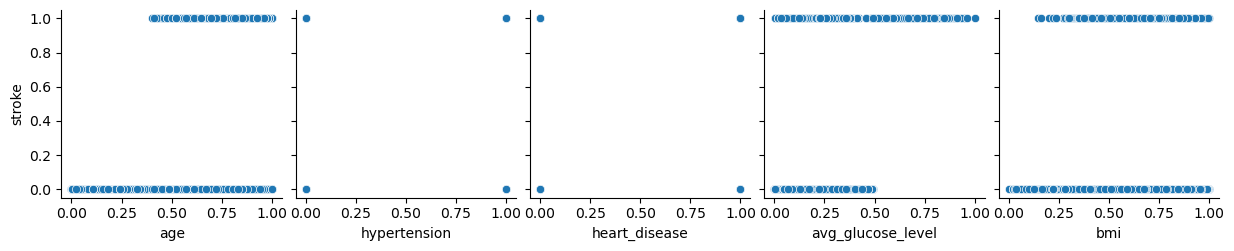

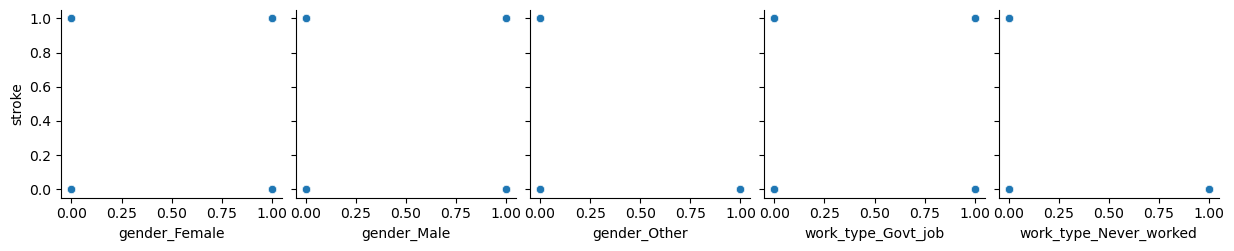

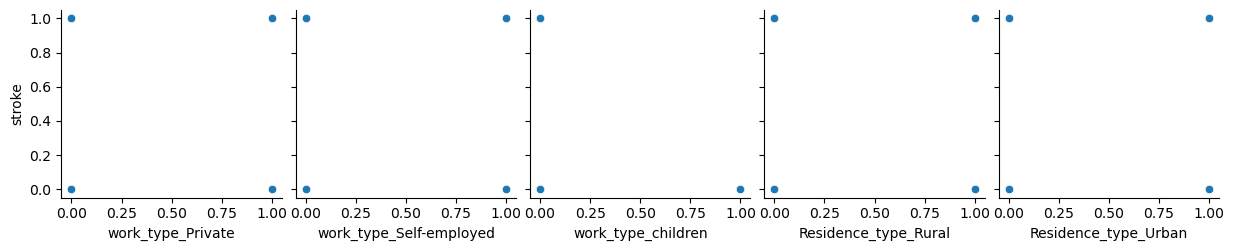

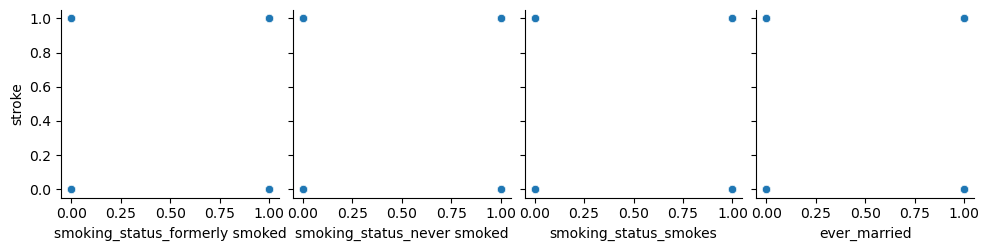

In [32]:
X = TRAIN.drop('stroke', axis=1)
y = TRAIN['stroke']


sns.pairplot(TRAIN, x_vars=X.columns[:5], y_vars='stroke')
sns.pairplot(TRAIN, x_vars=X.columns[5:10], y_vars='stroke')
sns.pairplot(TRAIN, x_vars=X.columns[10:15], y_vars='stroke')
sns.pairplot(TRAIN, x_vars=X.columns[15:], y_vars='stroke')
plt.show()

**Relaties**

Aan de hand van ons heatmap, waarbij we de correlatie waardes kunnen zien, hebben wij besloten om een threshold op te stellen van 0.1.  
Hiermee wordt bedoeld dat alle variabelen boven 0.1 zullen worden gekozen voor het trainen van de modellen. Die zijn nl.: age, hypertension, heart_disease en avg_glucose_level.

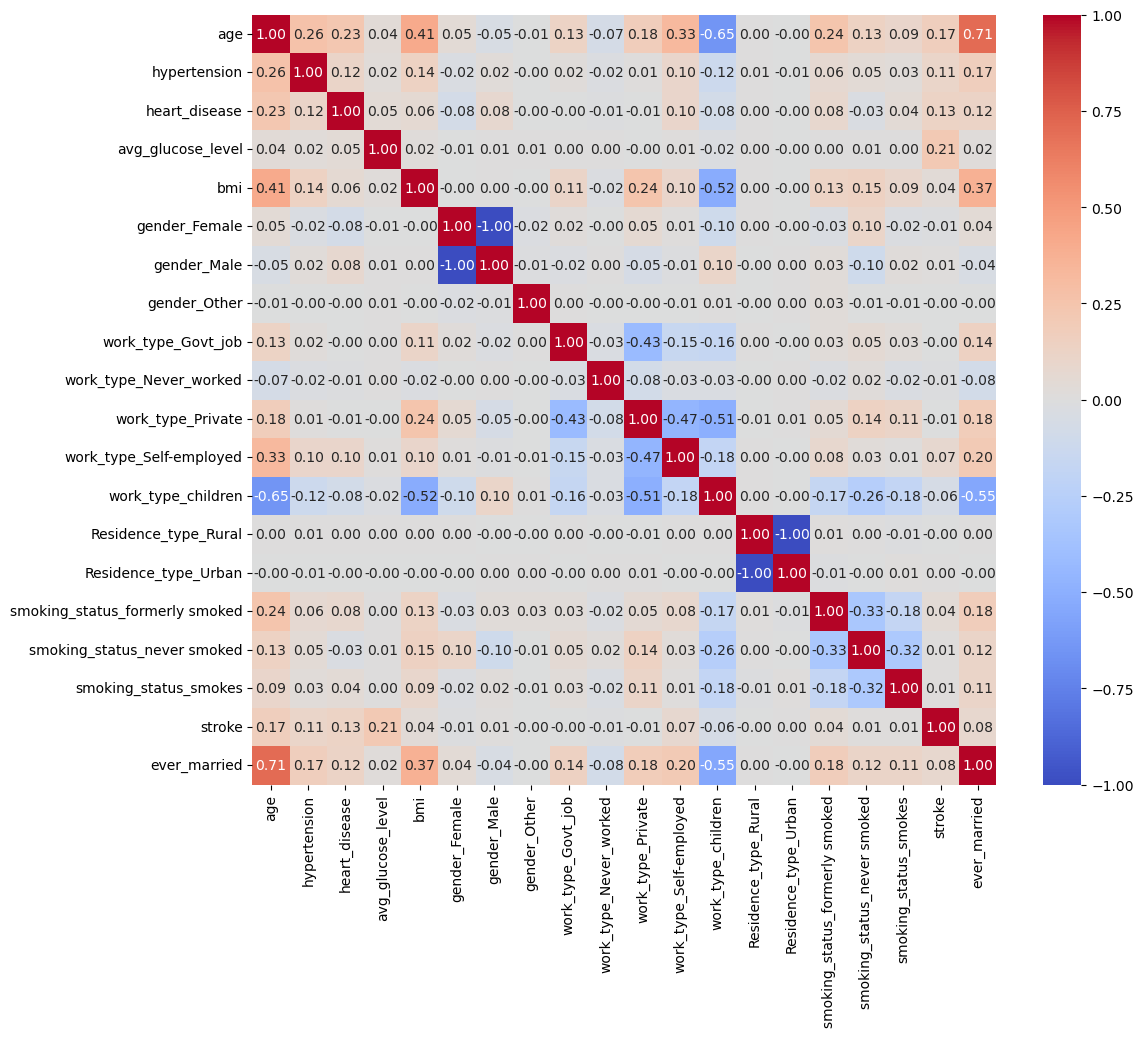

In [33]:
corr = TRAIN.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## Evaluatie

Wij hebben in deze opdracht te maken met een classificatieprobleem. Hierbij gebruiken wij de volgende metrics om te bepalen hoe goed een model presteert:


Accuracy : voorspeld het aantal correct geclassificeerde voorspellingen.

precision: Hoeveel van de fraudevoorspellingen zijn daadwekelijke fraude.

recall: hoeveel van de daadwerkelijke fraudegevallen heeft het model gevonden.

f1 : geeft een soort gemmiddelde van recall en precision.

In [34]:
X = TRAIN.drop('stroke', axis=1)
y = TRAIN['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [35]:
# Create Logistic Regression model and show the scores in classification report
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      8567
           1       0.07      0.84      0.13       148

    accuracy                           0.80      8715
   macro avg       0.53      0.82      0.51      8715
weighted avg       0.98      0.80      0.88      8715



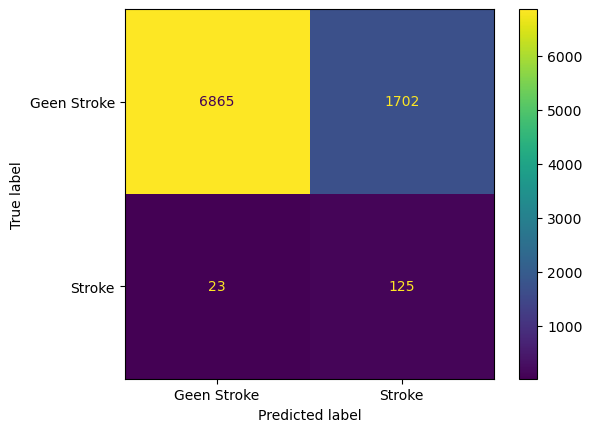

accuracy is 0.802065404475043
precision is 0.06841817186644773
recall is 0.8445945945945946
f1-score is 0.12658227848101267


In [36]:
#confusionmatrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Geen Stroke', 'Stroke'])
cmd.plot()  
plt.show()

# Formules of the metrics and calculation with the confusion matrix
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

accuracy = ((TP + TN)/(TP + TN + FP + FN))
precision = TP / (TP + FP) 
recall = TP / (TP + FN) 
f1_score= 2*precision*recall/(precision + recall)

print('accuracy is',accuracy)
print('precision is',precision)
print('recall is',recall)
print('f1-score is',f1_score)

f1-score is voor deze vraagstuk het best maatstaf doordat, Wij hebben bij deze vraagstuk te maken met een imbalanced dataset hierbij is het belangrijk dat wij de nauwkeurigheid van het model goed hebben . Wij vinden dat beide precision en recall even belangrijk zijn. Zodat wij min mogelijk false negatives hebben, want anders verliezen we iemand. En zelfde voor false positives, anders gaat het zoveel mensen zomaar bang maken en naar de hospitaal gaan, alleen om te horen dat ze geen herseninfarct hebben en geld hebben verspild. 

## Modeling

Zoals eerder genoemd, is de data imbalanced. Er zijn verschillende technieken om met imbalanced data te werken, zoals resampling technieken en class weighting.  
We gaan werken met class weighting. Class weighting houdt in dat we een gewicht geven aan de klassen (in dit geval 0 en 1) om een verschil in belangrijkheid toe te wijzen. Omdat er veel meer 0 zitten dan 1, dan gaat 0 een lagere gewicht krijgen dan 1.

In [52]:
X = TRAIN[['age','hypertension','heart_disease','avg_glucose_level']]
y = TRAIN['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### K-Nearest Neighbors

**UITLEG**

### Logistic Regression

**UITLEG**

### SVM

**UITLEG**

### Decision Tree

**UITLEG**

### Ensembles

**UITLEG**

#### Random Forest

#### Gradient Boosted Decision Trees

Gradientboosting is een algoritme in machine learning dat voornamelijk word gebruikt voor classificatie en ook regressie. Het combineert zwakke moddellen om een sterker model te creeren dit word ookwel “boosting “genoemd. Tijdens het maken van het nieuwe model probeert het model de fouten van het vorige model te minimaliseren. Er worden steeds nieuwe modellen aan de ensemmble toegevoegd dot de stopcriteria is bereikt. Het doet dit op een sequentiële volgorde. Dit betekent dat elke nieuwe model afhankelijk is voor de prestaties van het vorige model. Hierdoor kan het zijn dat de training van dit model langer duren dan normaal. 

#### XGBoost

XGBoost (eXtreme Gradient Boosting) is een krachtig machine learning-algoritme dat goed werkt voor zowel regressie als classificatie. Het combineert meerdere eenvoudige modellen (meestal beslisbomen) om samen een sterk en nauwkeurig model te vormen. XGBoost gebruikt gradient boosting om de fouten steeds verder te verkleinen door het model bij elke stap te verbeteren. Daarbij worden ook technieken toegepast om overfitting te voorkomen, zoals L1- en L2-regularisatie.

XGBoost is snel en efficiënt, kan goed omgaan met grote datasets en heeft een ingebouwde manier om ontbrekende gegevens af te handelen. Het is populair vanwege zijn snelheid, nauwkeurigheid en vermogen om ingewikkelde verbanden tussen kenmerken te verwerken.  
[(GeeksforGeeks, 2023)](https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/)

In [ ]:
# Calculate scale_pos_weight
neg, pos = y_train[y_train == 0].shape[0], y_train[y_train == 1].shape[0]
scale_pos_weight = neg / pos

In [51]:
xgb_model = xgb.XGBClassifier(n_estimators=500, 
                              learning_rate= 0.1, 
                              max_depth=4, 
                              reg_lambda=1,
                              scale_pos_weight=scale_pos_weight,
                              objective='binary:logistic')

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_f1 = f1_score(y_test, xgb_pred)
print(f'XGBoost f1-score:{xgb_f1}')

XGBoost f1-score:0.19578686493184635


In [ ]:
# Tuning

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

param_grid = {
    'n_estimators': [50, 100, 200, 250, 300],
    'max_depth': [None, 5, 10, 20, 30, 40, 50, 100],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'subsample': [0.5, 0.8, 0.9, 1.0],
    'reg_lambda': [0, 1],
    'reg_alpha': [0, 1],
    'scale_pos_weight': [scale_pos_weight],
    'colsample_bytree': [0.5, 0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           scoring='f1', 
                           cv=5,
                           verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

xgb_tuned = grid_search.best_estimator_
y_pred = xgb_tuned.predict(X_test)

print(f1_score(y_test, y_pred))

### Self-assembled ensemble

Een Voting Classifier is een machine learning-techniek die gebruikmaakt van meerdere modellen om samen een betere en nauwkeurigere voorspelling te maken. Dit is een vorm van ensemble learning, waarbij verschillende basismodellen worden gecombineerd om de prestaties van een model te verbeteren. Het idee hierachter is dat door de voorspellingen van verschillende modellen te combineren, we de bias en variatie kunnen verkleinen en zo de nauwkeurigheid kunnen vergroten.

Er zijn twee soorten voting classifiers:
- Hard Voting: Hierbij wordt de klasse gekozen die het vaakst door de individuele modellen wordt voorspeld. De klasse met de meeste stemmen wordt de uiteindelijke voorspelling.  
- Soft Voting: Hierbij worden de waarschijnlijkheden van elke klasse door de modellen gemiddeld. De klasse met de hoogste gemiddelde waarschijnlijkheid wordt dan als eindvoorspelling gekozen.

In plaats van elk model apart te evalueren, gebruikt de Voting Classifier de gecombineerde kracht van meerdere modellen om een robuustere voorspelling te maken.  
[(GeeksforGeeks, 2023a)](https://www.geeksforgeeks.org/voting-classifier/)  

De modellen gaan we kiezen door middel van de f1-score van de modellen.  
We kiezen om met soft voting te werken, omdat het werken met gemiddeld probabilities een betere voorspelling kan geven.

In [ ]:
# Create individual models
log_clf = LogisticRegression(max_iter=1000, class_weight='balanced')
tree_clf = DecisionTreeClassifier(class_weight='balanced')
svm_clf = SVC(probability=True, class_weight='balanced')  # Use probability=True for soft voting

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('dt', tree_clf),
    ('svc', svm_clf)
], voting='soft')  # 'hard' for majority voting or 'soft' for weighted voting based on probabilities

# Fit the model
voting_clf.fit(X_train, y_train)

# Make predictions
voting_pred = voting_clf.predict(X_test)

voting_f1 = f1_score(y_test, voting_pred)
print(f'f1-score: {voting_f1}')

## Results

|Model|f1-score|kaggle score|
|-----|--------|------------|
|KNN|||
|Logistic Regression|||
|SVM|||
|Decision Tree|||
|Random Forest|||
|Gradient Boost|||
|XGBoost|||
|Voting Classifier|||


In [ ]:
def submission(model, file_name='submission'):
    '''Makes prediction on the test data and makes a csv containing the id and predictions.
    This is used to make a csv file to submit in the kaggle competition.

    Parameters:
        model: the trained model.
        file_name (str): name of the csv file. On default: 'submission'
    '''
    y_pred = model.predict(TEST[X.columns])
    copy_test = TEST.copy()
    copy_test['stroke'] = y_pred
    sub = copy_test[['stroke']].reset_index()

    os.makedirs('predictions', exist_ok=True)

    csv_file = f'predictions/{file_name}.csv'
    sub.to_csv(csv_file, index=False)
    print(f'Submission saved to {csv_file}')

In [ ]:
submission(log_reg, 'log_reg')

Submission saved to predictions/log_reg.csv


## Conclusion & Advice

## Sources

[GeeksforGeeks, 2023](https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/)  
[GeeksforGeeks, 2023a](https://www.geeksforgeeks.org/voting-classifier/)